In [1]:
from train import get_loaders
import torch
import yaml

/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,
/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/catalyst/registry/registry.py:42: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class Registry(collections.MutableMapping):


In [2]:
with open('training_configs/dataset/eyes_sorting2.yaml') as f:
    dl_config = yaml.safe_load(f)

In [3]:
dl_config['train_test_split_kwargs']['volumes_limit'] = 5

In [4]:
train_loader, test_loader = get_loaders(**dl_config)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 1.3 sec.


In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
%%time
bloat = train_loader.__iter__()

CPU times: user 29.8 ms, sys: 501 ms, total: 530 ms
Wall time: 554 ms


In [7]:
%%time
batch = bloat.__next__()

CPU times: user 1.99 s, sys: 1.24 s, total: 3.23 s
Wall time: 3.59 s


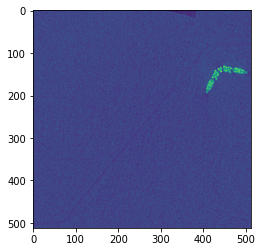

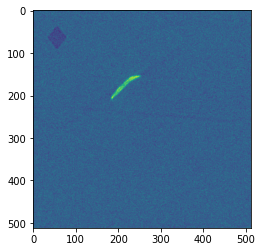

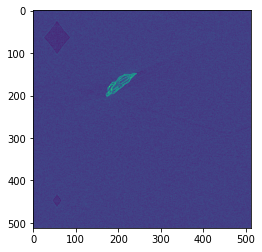

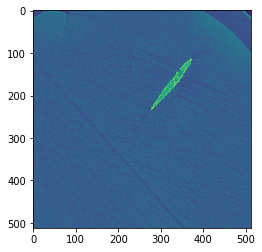

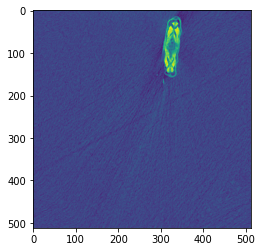

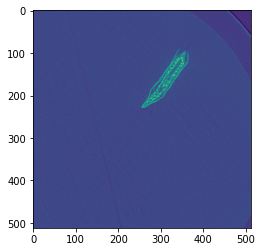

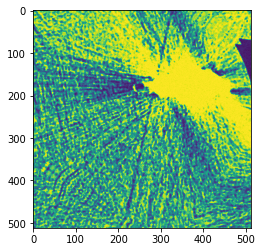

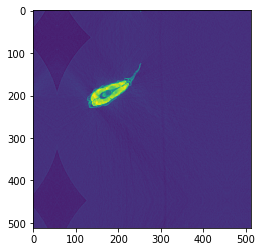

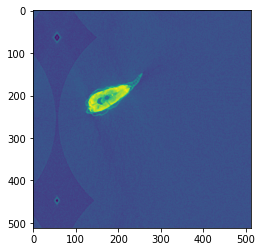

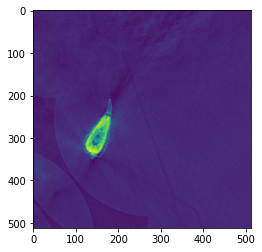

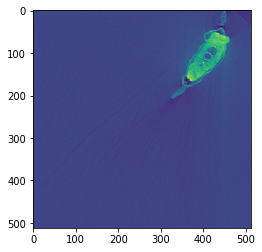

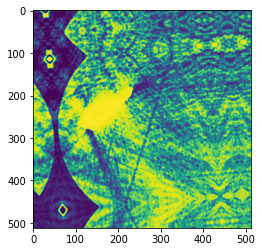

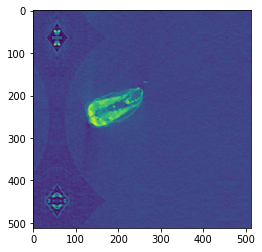

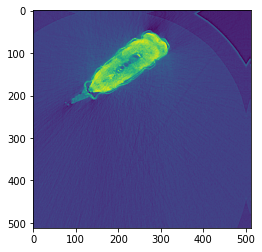

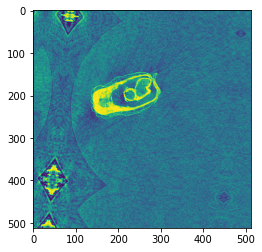

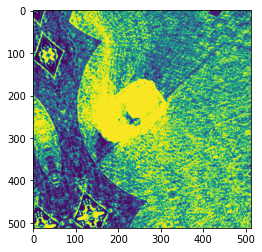

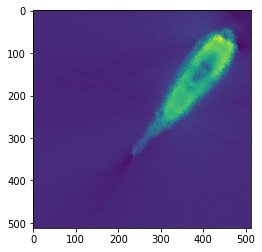

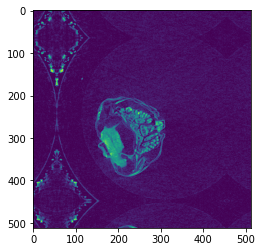

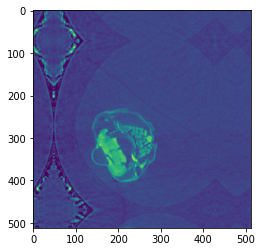

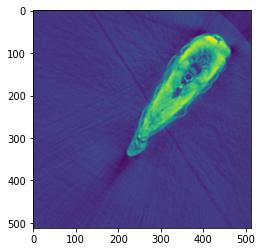

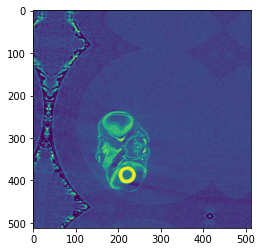

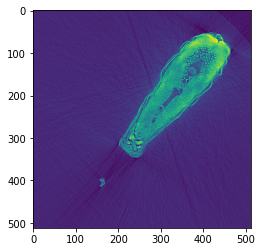

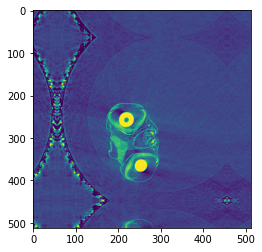

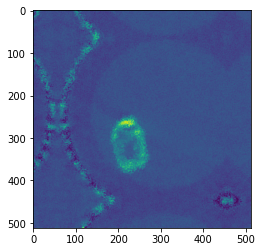

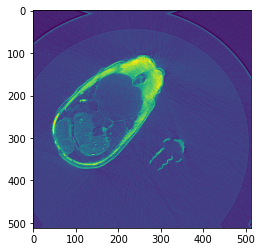

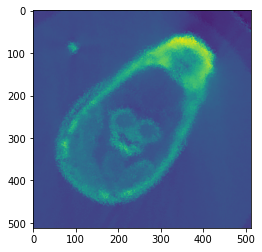

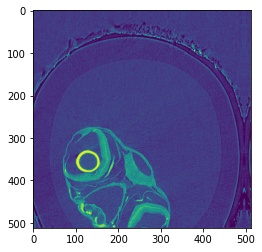

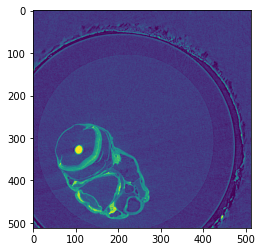

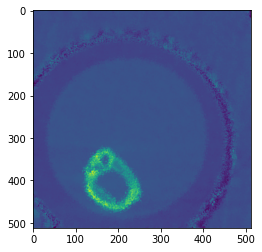

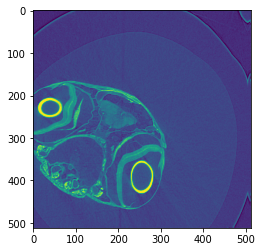

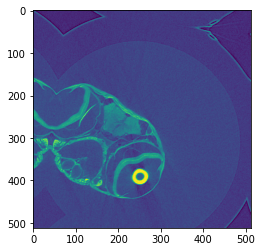

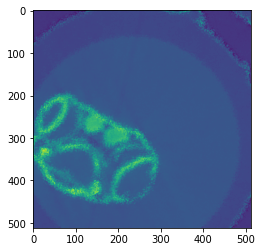

In [8]:
for i in torch.argsort(batch[1]):
    plt.imshow(batch[0][i, 0])
    plt.show()

In [9]:
from train import get_criterion

In [10]:
with open('training_configs/criterion/sorting.yaml') as f:
    cr_config = yaml.safe_load(f)

In [11]:
criterion = get_criterion(**cr_config)

>>>>>>>>>>>>>>>> getting criterion
<<<<<<<<<<<<<<<< done in 0.0001 sec.


In [12]:
from train import get_model

In [13]:
with open('training_configs/model/eyes_sorting.yaml') as f:
    md_config = yaml.safe_load(f)

In [14]:
model = get_model(**md_config)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 11170755
<<<<<<<<<<<<<<<< done in 0.18 sec.


In [15]:
embedding = model(batch[0])
loss = criterion(embedding, batch[1])
print(embedding, loss)

tensor([[ 0.4615],
        [ 1.7507],
        [-0.1216],
        [ 0.1485],
        [ 0.1026],
        [ 0.0342],
        [ 0.3816],
        [-0.5353],
        [-0.5675],
        [-0.1508],
        [ 0.2250],
        [ 1.0277],
        [-0.5954],
        [-0.2141],
        [-0.2186],
        [-0.0069],
        [-0.4555],
        [-0.4921],
        [ 0.3696],
        [-0.2707],
        [-0.3365],
        [ 1.9609],
        [-0.4959],
        [-0.5230],
        [-0.3904],
        [-0.1683],
        [ 0.1389],
        [-0.2320],
        [-0.2993],
        [ 0.0946],
        [-0.3387],
        [-0.2833]], grad_fn=<SelectBackward>) tensor(0.4039, grad_fn=<MeanBackward0>)
